In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv(r'C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\avocado.csv')
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


C:\Users\a864911\AppData\Local\Temp\ipykernel_24496\1073097835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AveragePrice'])


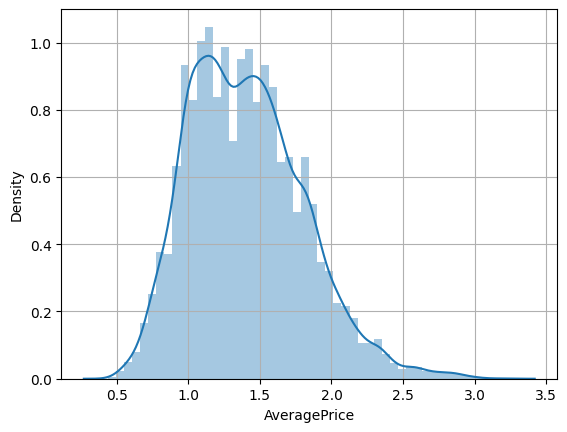

In [9]:
sns.distplot(df['AveragePrice'])
plt.grid()
plt.show()

<Axes: xlabel='year', ylabel='count'>

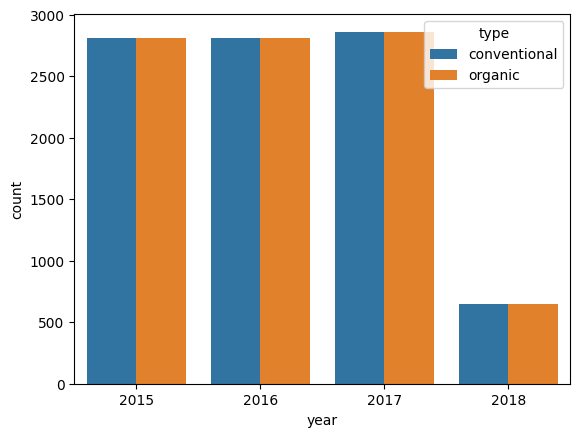

In [10]:
sns.countplot(x='year',data=df,hue='type')

<Axes: xlabel='AveragePrice', ylabel='type'>

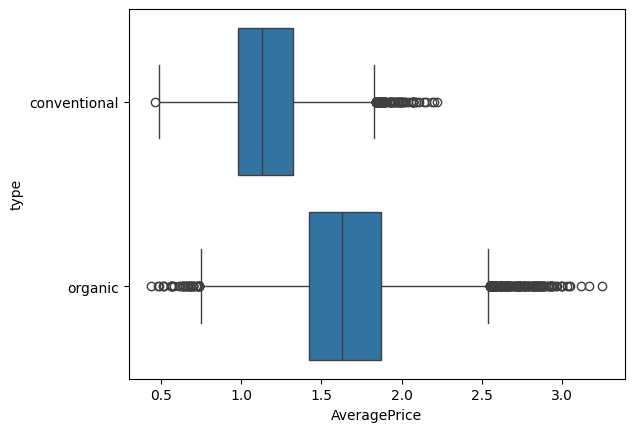

In [11]:
sns.boxplot(x='AveragePrice',y='type',data=df)

In [12]:
df['type']= df['type'].map({'conventional':0,'organic':1})
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany


In [13]:
df.Date=df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',inplace=True,axis=1)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})


<Axes: xlabel='Month', ylabel='count'>

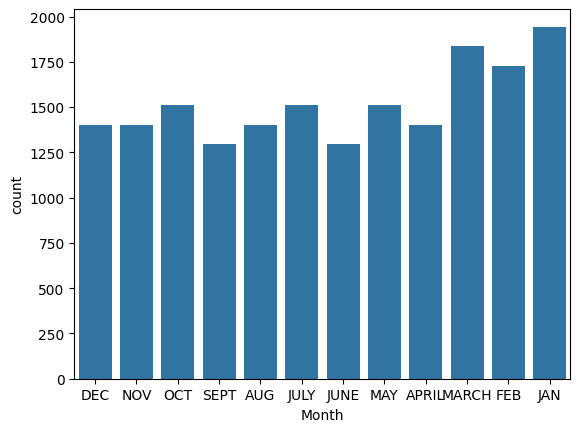

In [14]:
sns.countplot(data=df,x='Month')

In [15]:
#Preparing Model
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
dummies.shape


(18249, 65)

In [16]:
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)

In [17]:
target = df['AveragePrice']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_dummies,target,test_size=0.2,random_state=0)

In [19]:
#Standard Scalaer
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
standard_scalar=StandardScaler()
standard_scalar.fit(X_train[cols_to_std])
X_train[cols_to_std]=standard_scalar.transform(X_train[cols_to_std])
X_test[cols_to_std]=standard_scalar.transform(X_test[cols_to_std])


In [20]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
linear_model.score(X_test,Y_test)

0.6196158830327293

In [22]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [ ]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score','predict'])
for method,func in regressors.items():
    model = func.fit(X_train,Y_train)
    pred = model.predict(X_test)    
    model_score=model.score(X_test,Y_test)
    results.loc[method]= [np.round(mean_absolute_error(Y_test,pred),3),
                          np.round(mean_squared_error(Y_test,pred),3),
                          np.round(r2_score(Y_test,pred),3),
                          model_score*100                          
                         ]

In [29]:
results

,MAE,MSE,R2-score,predict
Linear Regression,0.188,0.062,0.620,61.961588
Decision Tree,0.127,0.036,0.780,77.963065
Random Forest,0.094,0.018,0.887,88.690100
Support Vector Machines,0.119,0.028,0.825,82.537515
K-nearest Neighbors,0.094,0.020,0.875,87.492111
XGBoost,0.095,0.017,0.896,89.630091
